<a href="https://colab.research.google.com/github/Cozyzheng/Spatial/blob/master/pythonic_RS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# pythonic geospatial data analysis.
!pip install rasterio
import rasterio
import numpy as np 
import matplotlib
import folium
from matplotlib import pyplot as plt  
%matplotlib inline 

     |████████████████████████████████| 18.1MB 236kB/s 


In [7]:
im_data = rasterio.open('/content/drive/My Drive/RS data/2011/2011jiuduansha_landsat8')

print(im_data.meta)
im_numpy = im_data.read()
im = [im_data.read(4),im_data.read(3), im_data.read(2)]
# im.shape

{'driver': 'ENVI', 'dtype': 'uint16', 'nodata': 0.0, 'width': 668, 'height': 448, 'count': 7, 'crs': CRS.from_epsg(32651), 'transform': Affine(30.0, -0.0, 391845.0,
       -0.0, -30.0, 3458475.0)}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 448, 668)
(448, 668, 3)


Text(0.5, 1.0, 'RGB in matplotlib imshow')

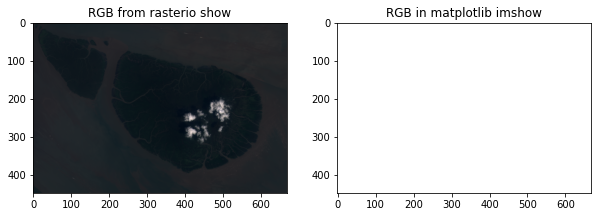

In [8]:
# 自带的plot函数，图像可视化
from rasterio.plot import show,show_hist, reshape_as_image, reshape_as_raster, adjust_band
import folium 

# scale band to 0 to 1
im_ad = adjust_band(im)
print(im_ad.shape) # 波段 * 行（高） * 列（宽）
im_rs = reshape_as_image(im) 
print(im_rs.shape) # 行 * 列* 波段

# rasterio的show，是基于matplotlib的
# 这里的rasterio自带的show只能用于list的可视化，需要从numpy数据中取波段list[n,:,:]
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

show(im_ad, ax=axs[0]) # 需要直方图拉伸,可能需要用到opencv
axs[0].set_title("RGB from rasterio show")

# plot with normal matplotlib functions
axs[1].imshow(im_rs)
axs[1].set_title("RGB in matplotlib imshow")

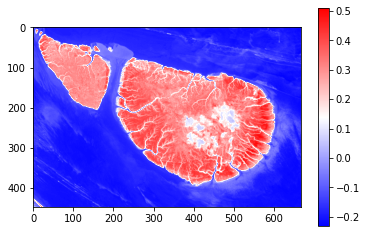

In [16]:
# 计算ndvi
# 忽略错误，因为有像元为NaN
np.seterr(divide='ignore', invalid='ignore')

Nir = im_numpy[4] # Landsat第5个波段;im_data.read(5)
Red = im_numpy[3] # Landsat第4个波段;im_data.read(4)

# 浮点数运算，否则整型运算返回的整数
ndvi = (Nir.astype(float) - Red.astype(float)) / (Nir.astype(float) + Red.astype(float))
# print(ndvi)
plt.imshow(ndvi, cmap='bwr')
plt.colorbar()
plt.show()

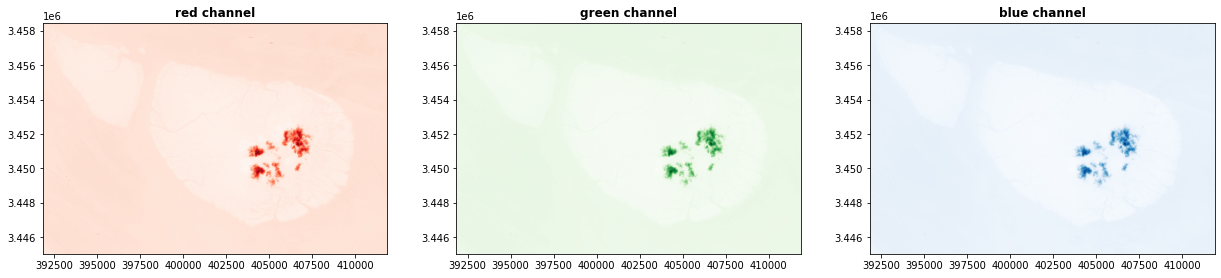

In [10]:
fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(21,7))
show((im_data, 3), ax=axr, cmap='Reds', title='red channel')
show((im_data, 2), ax=axg, cmap='Greens', title='green channel')
show((im_data, 1), ax=axb, cmap='Blues', title='blue channel')